In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x1, y1 = 0, 4
x2, y2 = 2, 10

x = np.array([[x1, 1],[x2, 1]])
y = np.array([[y1], [y2]])
np.linalg.inv(x.T @ x) @ x.T @ y # 행렬곱 @ 과 역행렬np.linalg.inv 곱으로 직선의 방정식 기울기 a, 절편 b 구하기

array([[3.],
       [4.]])

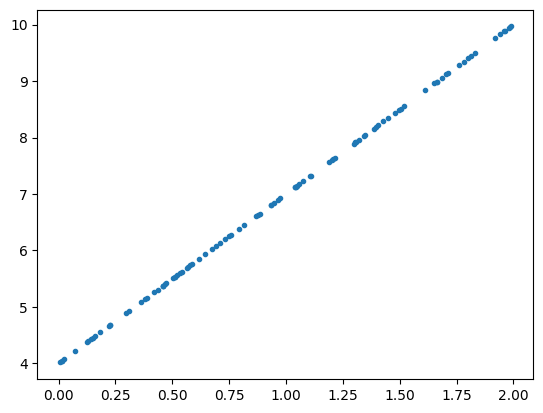

In [ ]:
m= 100
x = np.random.rand(m, 1) * 2
y = x * 3 + 4

plt.plot(x, y, '.')

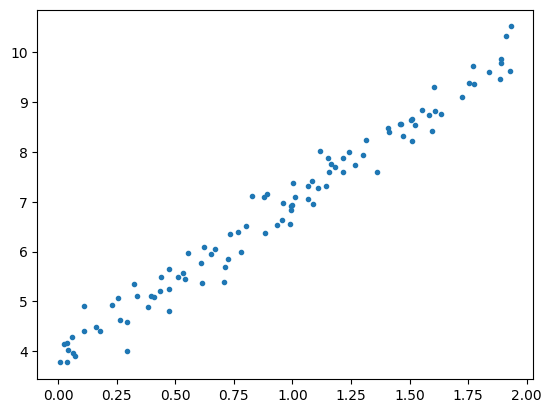

In [ ]:
m= 100
x = np.random.rand(m, 1) * 2
y = x * 3 + 4 + np.random.randn(m, 1) * 0.3

plt.plot(x, y, '.')

a계수는: 2.931611623584289 b절편은: 4.064689233573368


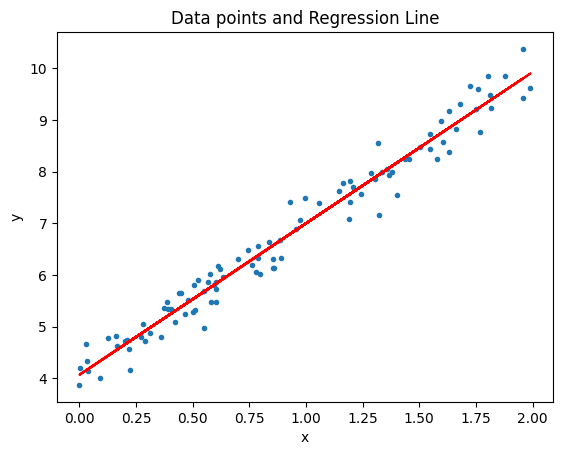

In [7]:
m= 100
x = np.random.rand(m, 1) * 2
y = x * 3 + 4 + np.random.randn(m, 1) * 0.3

plt.plot(x, y, '.')
x=x.flatten() #1차원으로 변환
y = y.flatten()#1차원으로 변환
a, b =np.polyfit(x, y, 1)
print('a계수는:', a, 'b절편은:', b)
y_pred = a * x + b

# 회귀선 출력
plt.plot(x, y_pred, 'r-')  # 'r-'는 빨간색의 실선을 의미합니다.
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points and Regression Line')
plt.show()

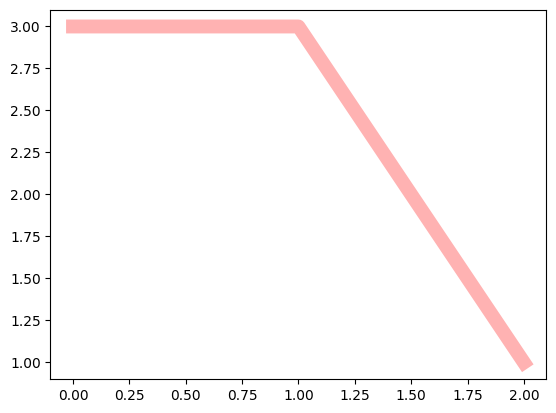

In [ ]:
x1, y1 = 0,3
x2, y2 = 1, 5
x3, y3 = 2, 1
plt.plot([x1, x2, x3], [y1, y1, y3], '-r', linewidth=10, alpha = 0.3)

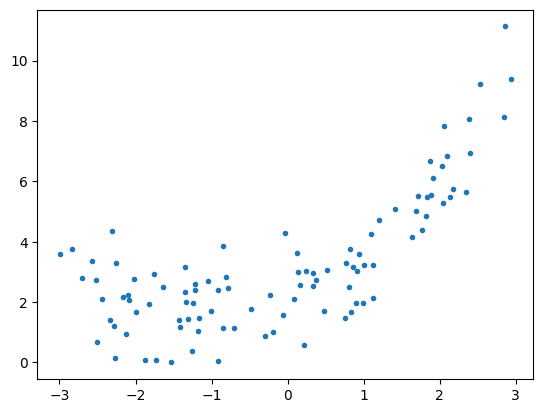

In [9]:
m = 100
x = np.random.rand(m, 1) * 6 - 3
y = 0.5 * (x**2) + x + 2 + np.random.randn(m, 1)
plt.plot(x, y, '.')

## 행렬로 연립방정식 풀어 해를 찾는 방법 (2차 다항식 이상)

In [11]:
xb = np.c_[x **2, x, np.ones(m)]
theta2 = np.linalg.inv(xb.T @ xb) @ xb.T  @ y #1번째 방법
theta2 = np.linalg.pinv(xb) @ y# 2번째 방법
theta2, _ ,_ , _ = np.linalg.lstsq(xb, y, rcond = None)# 3번째 방법 가장 효율적임
theta2

array([[0.49310339],
       [1.01656668],
       [2.01601426]])

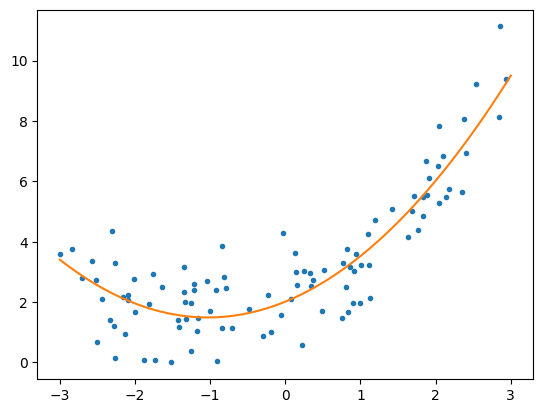

In [15]:
def model2(x):
  return  np.c_[x **2, x, np.ones(len(x))] @ theta2

x_new = np.linspace(-3, 3, 100)
y_new = model2(x_new)
plt.plot(x, y, '.')
plt.plot(x_new, y_new, '-')

In [31]:
def preprocess(x, n):
  poly = [x ** i for i in range(n+1)]
  xb = np.concatenate(poly, axis = 1)
  mean = xb.mean(axis = 0)
  std = xb.std(axis= 0) + 1e-6 # 분모가 0인경우 를 대비해서
  mean[0]=0
  std[0]=1
  xb_scale = (xb - mean) /std
  return xb_scale
xb_scale = preprocess(x, 10)
theta10 = np.linalg.pinv(xb_scale) @ y

(-3.0, 3.0, -3.0, 10.0)

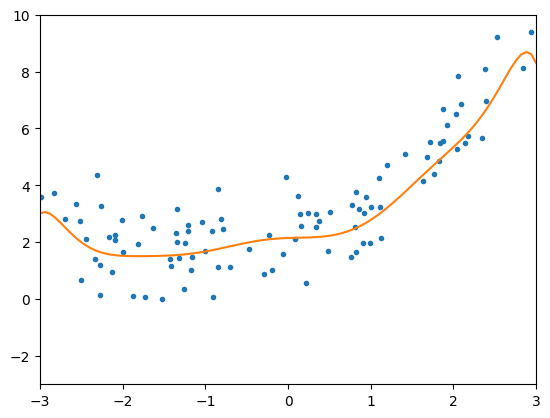

In [35]:
x_new = np.linspace(-3,3, 100).reshape(100,1)
x_new_b = preprocess(x_new, 10)
y_new = x_new_b @ theta10
plt.plot(x, y, '.')
plt.plot(x_new, y_new, '-')
plt.axis([-3, 3, -3, 10])

In [38]:
xb = preprocess(x, 10)
theta10 = np.linalg.pinv(xb) @ y
pred = xb @ theta10
mse = np.mean((pred - y)**2)
rmse = mse ** 0.5
mse, rmse


(0.8922124060880406, 0.9445699582815666)